In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-age-prediction-synthetic-dataset/Train.csv
/kaggle/input/human-age-prediction-synthetic-dataset/Test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('/kaggle/input/human-age-prediction-synthetic-dataset/Train.csv')
test_df = pd.read_csv('/kaggle/input/human-age-prediction-synthetic-dataset/Test.csv')

print(train_df.head())
print(test_df.head())


   Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.267312             54.63527

In [4]:
le = LabelEncoder()

train_df['Gender'] = le.fit_transform(train_df['Gender'])
test_df['Gender'] = le.transform(test_df['Gender'])


#  Feature Selection and Scaling

In [5]:
# Define features and target
features = ['Gender', 'Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)', 
             'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)']
X = train_df[features]
y = train_df['Age (years)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Prepare test data
X_test = test_df[features]
X_test = scaler.transform(X_test)


# Machine Learning Model
# Random Forest Regressor****

In [6]:
# Initialize and train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_reg.predict(X_val)
print('Random Forest Regression:')
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred_rf))
print('Mean Squared Error:', mean_squared_error(y_val, y_pred_rf))
print('R² Score:', r2_score(y_val, y_pred_rf))


Random Forest Regression:
Mean Absolute Error: 4.705133333333333
Mean Squared Error: 34.332919000000004
R² Score: 0.9162193032566763


# Deep Learning Model
# Neural Network with Keras

In [7]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_dl = model.predict(X_val)
print('Deep Learning Model:')
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred_dl))
print('Mean Squared Error:', mean_squared_error(y_val, y_pred_dl))
print('R² Score:', r2_score(y_val, y_pred_dl))


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3133.9216 - val_loss: 2763.0979
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2365.6753 - val_loss: 1136.7960
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 765.1891 - val_loss: 271.3567
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 287.4659 - val_loss: 188.0532
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 237.5823 - val_loss: 144.1420
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209.8015 - val_loss: 122.0277
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 174.9075 - val_loss: 103.9703
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 178.0889 - val_loss: 93.5244
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155.3249 - val_loss: 84.3193
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.4070 - val_loss: 77.6141
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142.2209 - val_loss: 71.2242
Epoch 12/50
60/60 ━━━━━━━━━━━━

# Random Forest Predictions

In [8]:
y_test_pred_rf = rf_reg.predict(X_test)

submission_rf = pd.DataFrame({'Age (years)': y_test_pred_rf})
submission_rf.to_csv('/kaggle/working/submission_rf.csv', index=False)


# Deep Learning Predictions

In [9]:
y_test_pred_dl = model.predict(X_test)

submission_dl = pd.DataFrame({'Age (years)': y_test_pred_dl.flatten()})
submission_dl.to_csv('/kaggle/working/submission_dl.csv', index=False)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


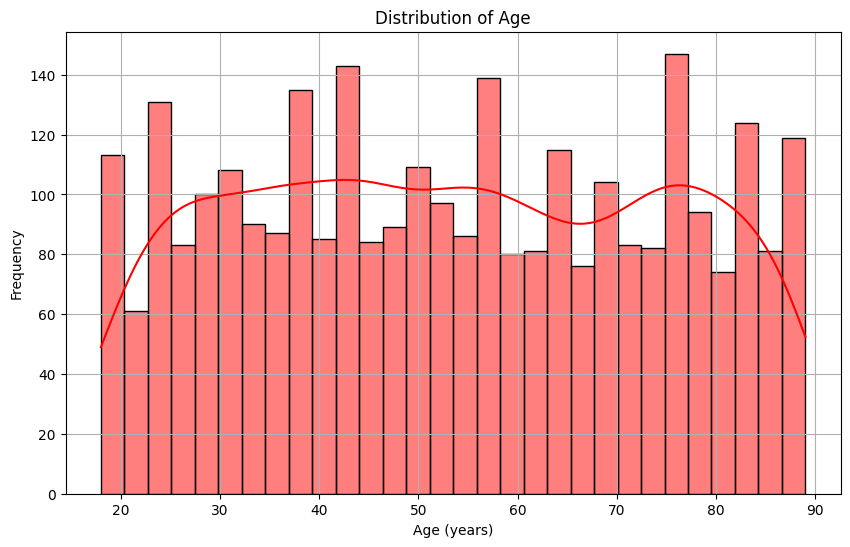

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age (years)'], bins=30, kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

fig = px.histogram(train_df, x='Age (years)', nbins=30, title='Distribution of Age', color_discrete_sequence=['brown'])
fig.update_layout(xaxis_title='Age (years)', yaxis_title='Frequency')
fig.show()


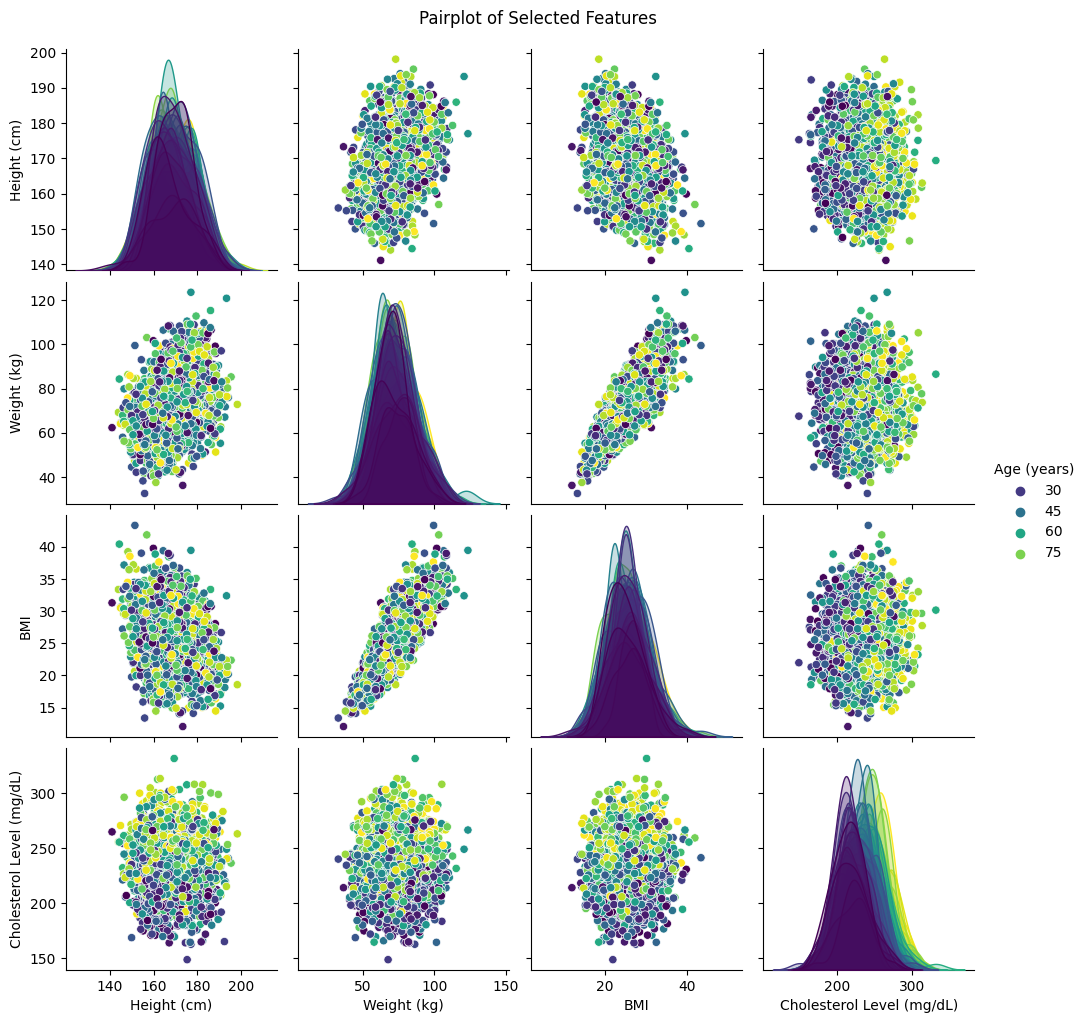

In [12]:
selected_features = ['Height (cm)', 'Weight (kg)', 'BMI', 'Cholesterol Level (mg/dL)', 'Age (years)']
sns.pairplot(train_df[selected_features], hue='Age (years)', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


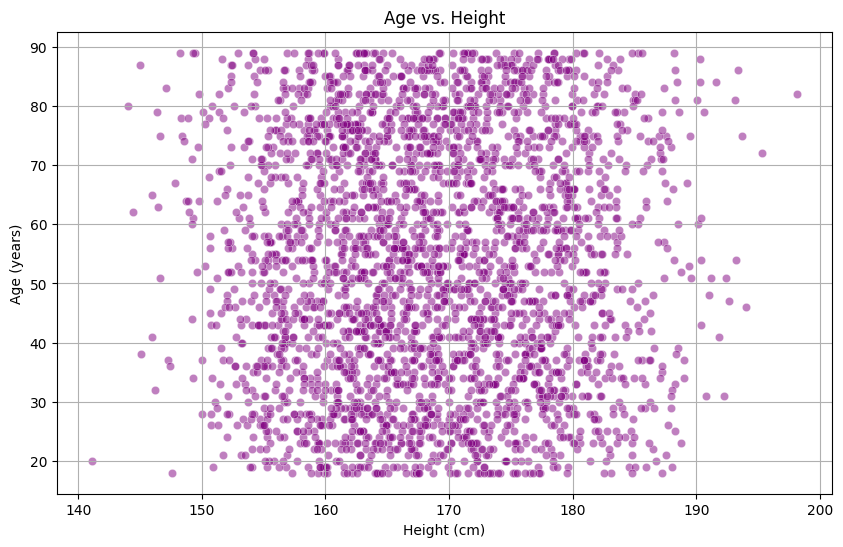

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (cm)', y='Age (years)', data=train_df, color='purple', alpha=0.5)
plt.title('Age vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Age (years)')
plt.grid(True)
plt.show()
fig = px.scatter(train_df, x='Height (cm)', y='Age (years)', color='Gender', title='Age vs. Height', color_discrete_sequence=['purple', 'orange'])
fig.update_layout(xaxis_title='Height (cm)', yaxis_title='Age (years)')
fig.show()
